# **Drought Characterization**
**Tolga Barış Terzi – 2025**

This notebook demonstrates how to use the `DChar` class to **identify and characterize drought events** in a time series.  
Drought characteristics include **duration, severity, intensity, interarrival, and recovery**.

The methodology is based on the **Run Theory**, proposed by **Yevjevich (1967)**.  

The Run Theory provides a framework for analyzing drought characteristics using indices such as SPI and SPEI:

- A drought event is defined as a **consecutive sequence** of time steps where the drought index falls below a predefined threshold (e.g., SPI ≤ −1 for moderate drought).  
- Key components of a drought event include:
  - **Onset**: the start of the drought event.
  - **Termination**: the end of the drought event.
  - **Duration**: the number of time steps within the event.
  - **Severity**: the sum of deficits of the drought index below the threshold.
  - **Intensity**: the average deficit of the drought index during the event.
- Systematically identifying drought events allows calculation of **frequency, interarrival times, recovery duration**, and other characteristics for long-term drought analysis.

---

## **Required Packages**


In [6]:
import pandas as pd
import numpy as np
import pydrght

---
## **Load the Data**

The example dataset contains monthly values of:

- **SPI-12**  

which we have generated using **precipitation data** and the **SI class** with a **3-parameter Gamma distribution**, and then saved into a CSV file.  
We will now load this time series and use it as input for drought characterization.

,DATE,Index,CDF
0,1965-09-01,-0.196276,0.422197
1,1965-10-01,-0.064632,0.474233
2,1965-11-01,-0.444248,0.328432
3,1965-12-01,0.361310,0.641066
4,1966-01-01,1.469601,0.929165


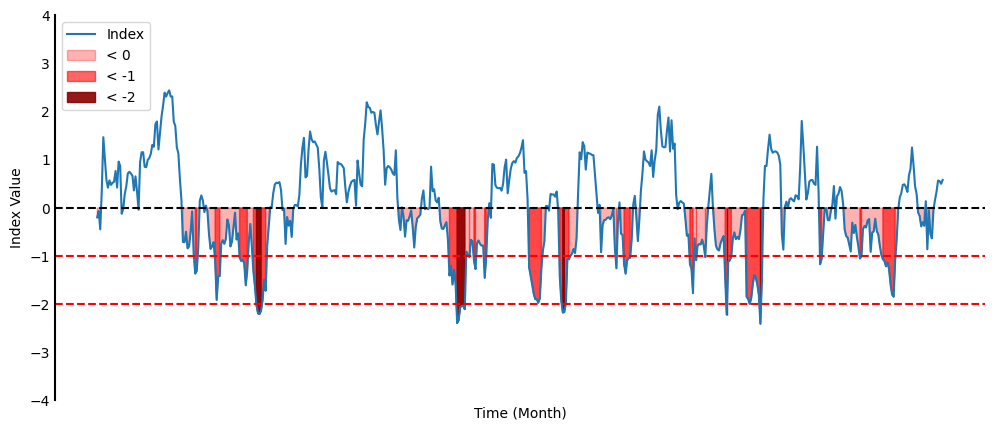

In [8]:
df = pd.read_csv("spi.csv")
display(df.head())
pydrght.utils.plot_index_with_severity(df["Index"])

---
## **Extract Drought Characteristics**
---
### **Initialize DChar Object**

We need to define:

- **Onset threshold**: value below which a drought is considered to start (e.g., SPI ≤ −1)

- **Recovery threshold**: value above which the drought is considered recovered (e.g., SPI ≥ 0)

- **Minimum drought duration**: minimum number of consecutive months to count as a drought


In [4]:
# Select SPI-12 column
spi_series = df["Index"]

# Define thresholds
onset_threshold = -1.0
recovery_threshold = 0.0
min_drought_duration = 1  # in months

# Initialize DChar
dchar = pydrght.DChar(time_series=spi_series,
              onset_threshold=onset_threshold,
              recovery_threshold=recovery_threshold,
              min_drought_duration=min_drought_duration)

---
### **Calculate the Drought Characteristics**


In [5]:
# calculate drought characteristics
drought_characteristics = dchar.calculate()

# preview the first few rows
display(drought_characteristics.head(10))  # show first 10 rows

,Duration,Severity,Intensity,Date_Ini_Ev,Date_Fin_Ev,Interarrival,Frequency_of_Occ,Recovery_Duration
0,2,-2.673279,-1.336639,64,66,11.0,0.361664,2
1,4,-5.845878,-1.461470,77,81,12.0,0.723327,No recovery
2,6,-7.267712,-1.211285,93,99,3.0,1.084991,No recovery
3,9,-16.629503,-1.847723,102,111,119.0,1.627486,3
4,11,-20.029517,-1.820865,230,241,2.0,1.989150,No recovery
5,1,-1.017427,-1.017427,243,244,2.0,0.180832,No recovery
6,2,-2.366498,-1.183249,246,248,5.0,0.361664,No recovery
7,2,-2.488051,-1.244025,253,255,27.0,0.361664,2
8,9,-14.936004,-1.659556,282,291,11.0,1.627486,3
9,7,-11.787775,-1.683968,302,309,30.0,1.265823,6


---
### **Interpretation of DChar Results**

Each row in the DChar output represents a **dry period** (drought event) characterized by:}

- **Duration**: Number of months the drought lasted.
- **Severity**: Cumulative SPI deficit over the drought period (more negative → more severe).
- **Intensity**: Average SPI deficit per month (Severity ÷ Duration).
- **Date_Ini_Ev**: Month index when the drought started.
- **Date_Fin_Ev**: Month index when the drought ended.
- **Interarrival**: Number of months between the end of the previous drought and the start of this one.
- **Frequency_of_Occ**: Cumulative frequency of drought occurrence up to this event.
- **Recovery_Duration**: Number of months to recover to the recovery threshold; `"No recovery"` indicates the series did not return above the threshold before the next drought.

This analysis quantifies **drought frequency, intensity, and duration**, providing insights for water resources, agriculture, and climate monitoring.


---

## **References**

- Yevjevich, V. (1967). *An objective approach to definitions and investigations of continental hydrologic droughts*. Colorado State University, Fort Collins, Colorado.  
